In [1]:
import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from strandtools.plot import plot_chromosome, plot

pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [2]:
PATH_TO_NORMALIZED_DATA = '../resources/BM510x3.txt.normalized.gz'
cwd = os.getcwd()
PATH_TO_STRANDTOOLS = os.path.join(cwd, "../")

In [3]:
counts = pd.read_csv(PATH_TO_NORMALIZED_DATA, index_col=0)
counts.head()

chrom   start      end   sample            cell          w          c  \
0  chr1       0   200000  BM510x3  BM510x3PE20401  18.806191  12.537461   
1  chr1  200000   400000  BM510x3  BM510x3PE20401   0.000000   0.000000   
2  chr1  400000   600000  BM510x3  BM510x3PE20401   0.000000  26.133269   
3  chr1  600000   800000  BM510x3  BM510x3PE20401  21.920134   2.740017   
4  chr1  800000  1000000  BM510x3  BM510x3PE20401  25.261188   0.000000   

   tot_count class  
0  31.343652    WW  
1   0.000000    WW  
2  26.133269    WW  
3  24.660151    WW  
4  25.261188    WW

## EXAMPLES

plotting a single chromosome from a single cell

<Axes: ylabel='10'>

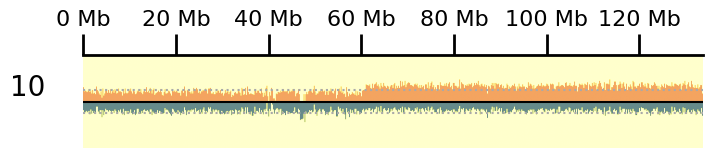

In [4]:
plot_chromosome(counts, chromosome = 'chr10', cell = 'BM510x3PE20403', median = 'chrom')

plotting to the ax of a pre-existing figure

In [5]:
import matplotlib.pyplot as plt

/var/folders/6p/vxqhhhvj3sj7dfqyg5bdjpp40000gp/T/ipykernel_39446/863958448.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


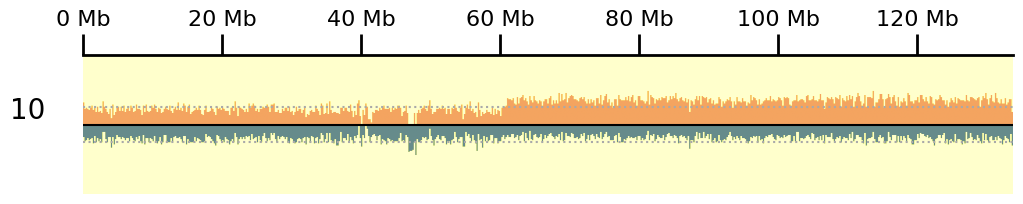

In [6]:
fig, ax = plt.subplots(figsize=(12,3))

plot_chromosome(counts, chromosome = 'chr10', cell = 'BM510x3PE20403', median= 'chrom', ax=ax)

fig.show()

plotting to multiple pre-existing axes, in this case the scale of the chromosome is not comparable.

/var/folders/6p/vxqhhhvj3sj7dfqyg5bdjpp40000gp/T/ipykernel_39446/1812022879.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


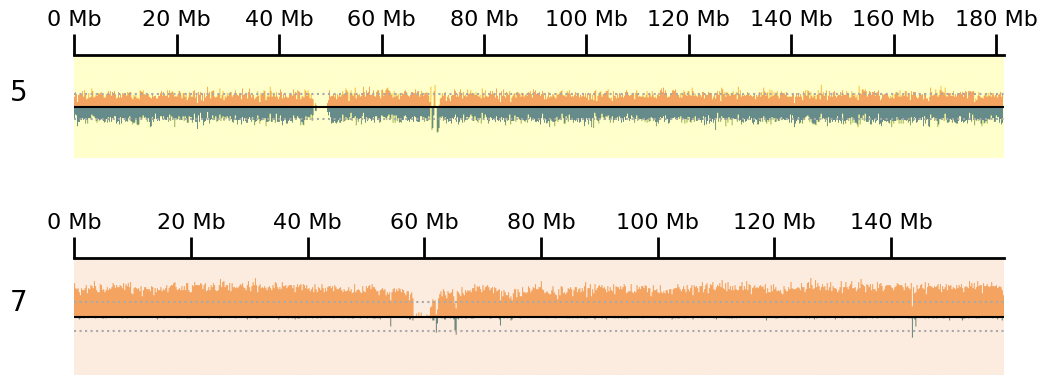

In [7]:
fig, ax = plt.subplots(figsize=(12,5), nrows=2, ncols=1)

plot_chromosome(counts, chromosome = 'chr5', cell = 'BM510x3PE20403', median= 'chrom', ax=ax[0])

plot_chromosome(counts, chromosome = 'chr7', cell = 'BM510x3PE20423', median= 'chrom', ax=ax[1])

fig.show()

Plotting lists of chromosomes and/or cells

When plotting lists, all the data in the count file is plotted, so it needs to be subset first.  
For this example I choose 3 chromosomes and 2 cells.

In [8]:
chrom = ['chr5', 'chr7', 'chr19']
cell = ['BM510x3PE20403', 'BM510x3PE20423']

df = counts[(counts['chrom'].isin(chrom)) & (counts['cell'].isin(cell))]

the plots can be grouped by chromosome or cell

/Users/tweber/miniconda3/envs/strandtools-condaenv/lib/python3.11/site-packages/strandtools/plot.py:333: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/Users/tweber/miniconda3/envs/strandtools-condaenv/lib/python3.11/site-packages/strandtools/plot.py:333: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/Users/tweber/miniconda3/envs/strandtools-condaenv/lib/python3.11/site-packages/strandtools/plot.py:333: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


[<Figure size 2500x400 with 2 Axes>,
 <Figure size 2500x400 with 2 Axes>,
 <Figure size 2500x400 with 2 Axes>]

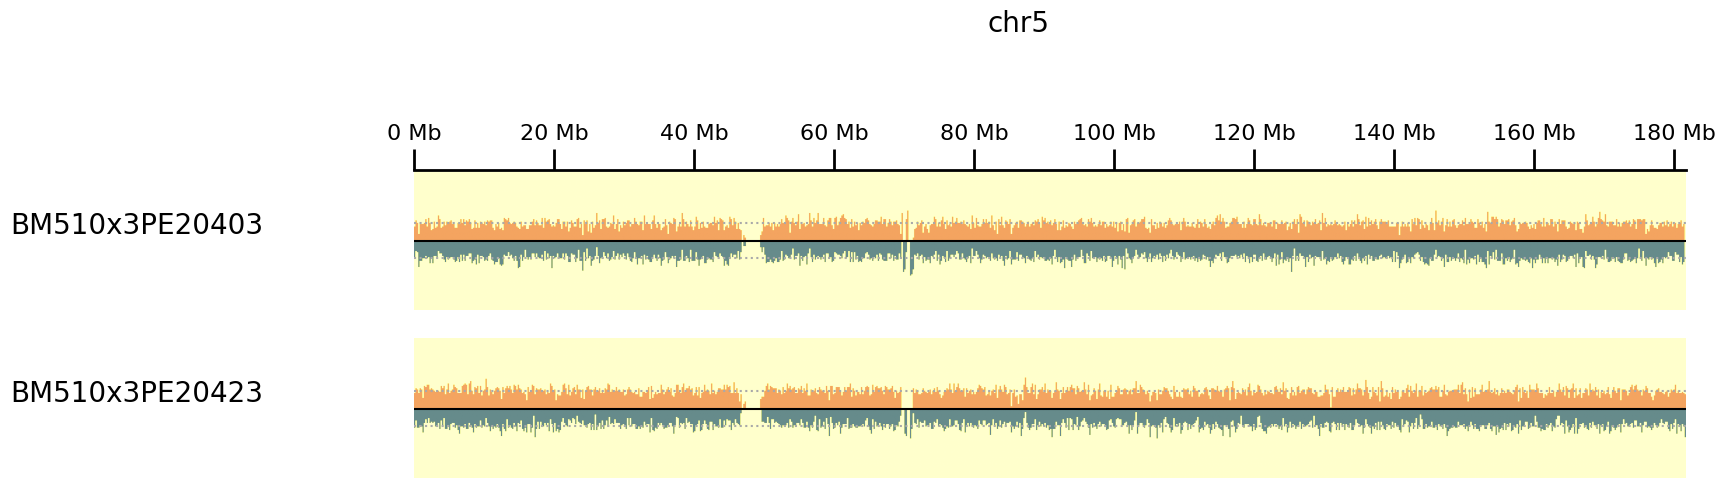

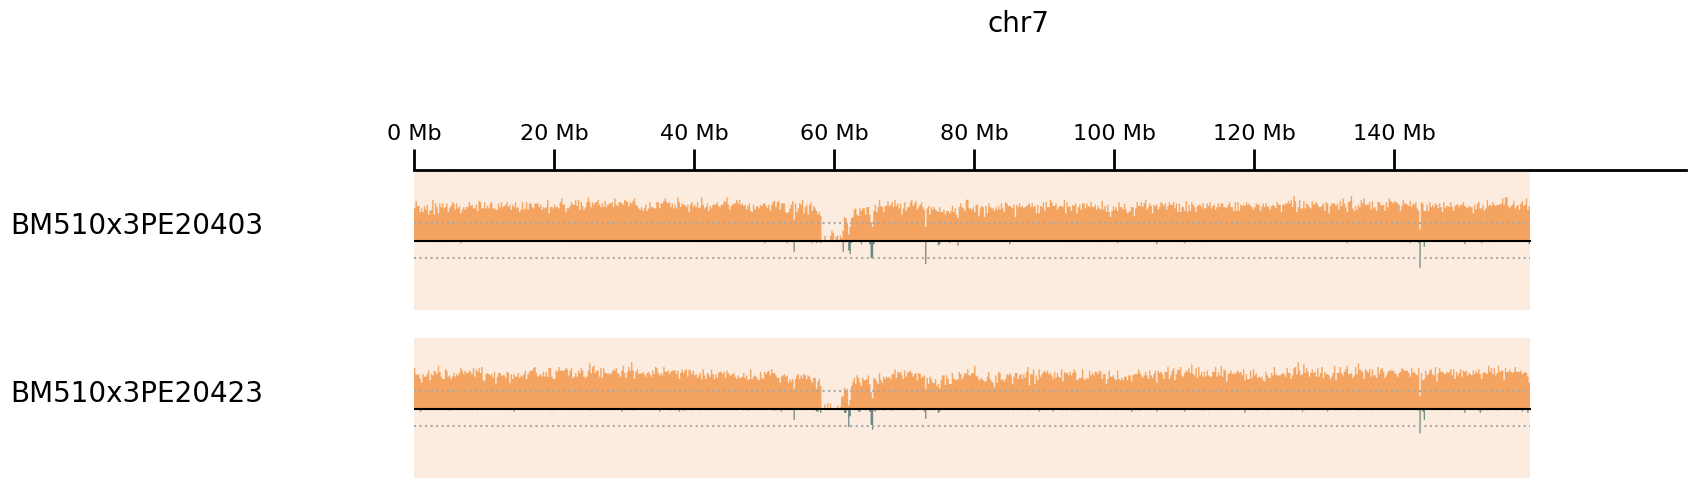

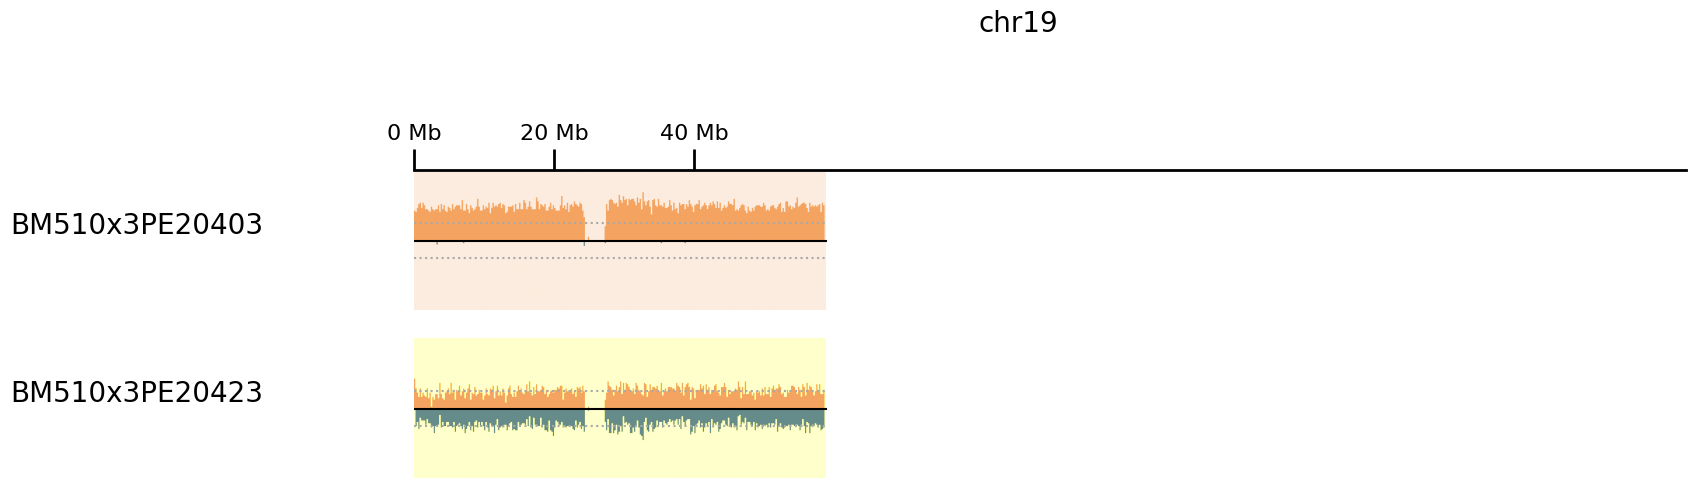

In [9]:
plot(df, groupby='chrom', median='chrom')

/Users/tweber/miniconda3/envs/strandtools-condaenv/lib/python3.11/site-packages/strandtools/plot.py:314: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/Users/tweber/miniconda3/envs/strandtools-condaenv/lib/python3.11/site-packages/strandtools/plot.py:314: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


[<Figure size 2500x600 with 3 Axes>, <Figure size 2500x600 with 3 Axes>]

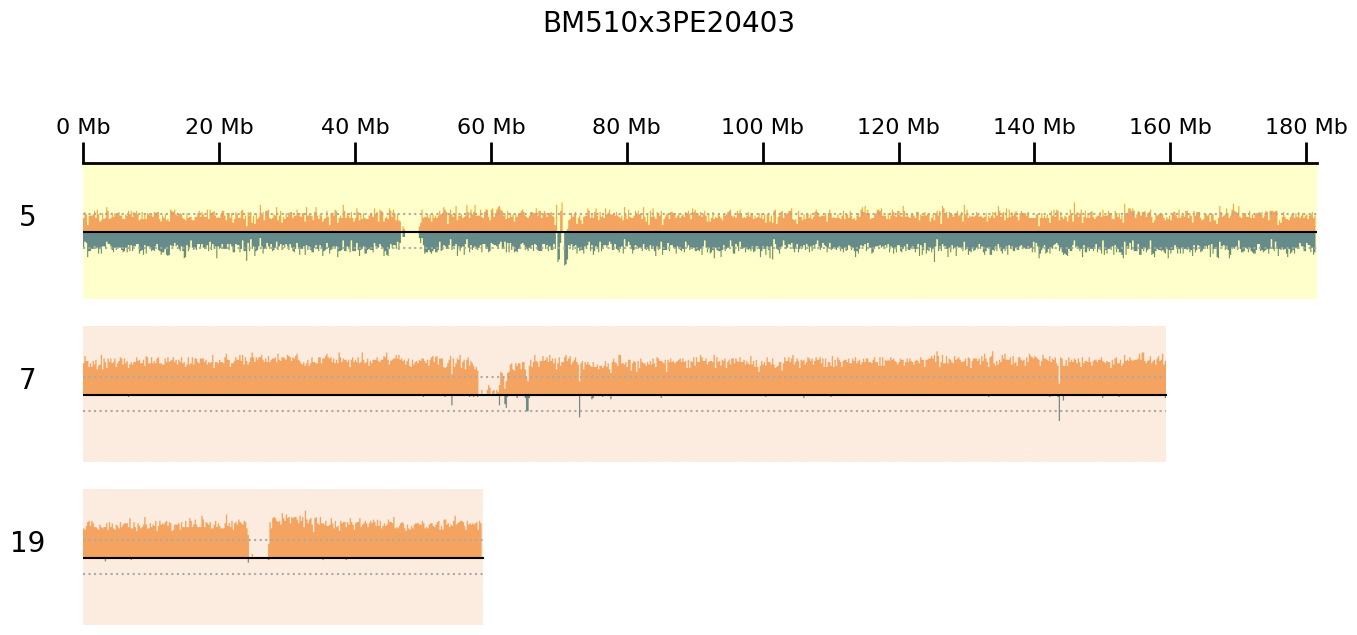

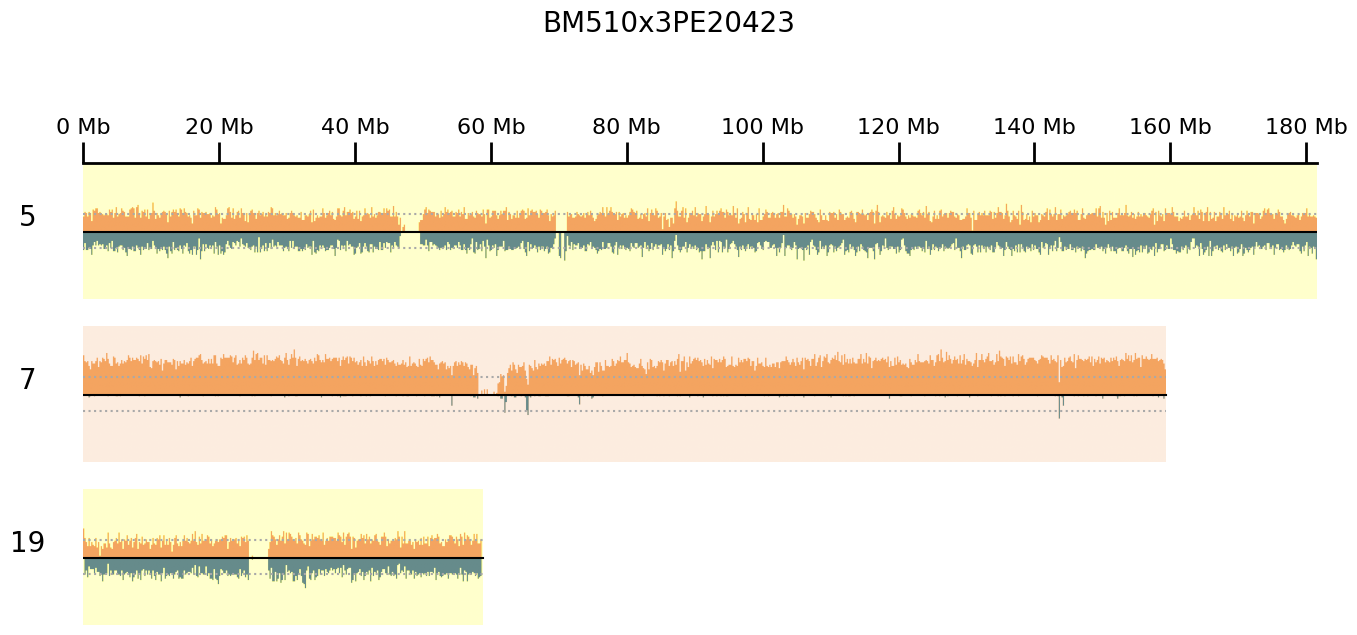

In [10]:
plot(df, groupby='cell', median='chrom')

Choosing how the median is handled has an effect on how the data is displayed.  
In the classical strandseq plots the median is calculated for each chromosome and the axis spans 2 times the median for both strand. However the median can also be calculated from all the bins within the same cell, to compare read depths across different chromosomes of the same cells, or even the complete dataset to compare across cells.

/var/folders/6p/vxqhhhvj3sj7dfqyg5bdjpp40000gp/T/ipykernel_39446/123491151.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


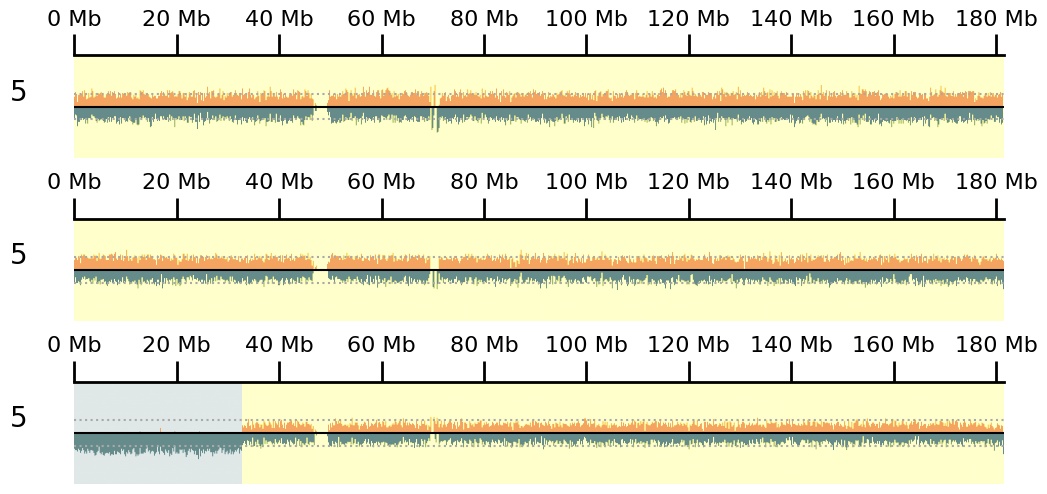

In [11]:
fig, ax = plt.subplots(figsize=(12,6), nrows=3, ncols=1)

plot_chromosome(counts, chromosome = 'chr5', cell = 'BM510x3PE20403', median= 'chrom', ax=ax[0])
plot_chromosome(counts, chromosome = 'chr5', cell = 'BM510x3PE20423', median= 'cell', ax=ax[1])
plot_chromosome(counts, chromosome = 'chr5', cell = 'BM510x3PE20434', median= 'all', ax=ax[2])

fig.show()

It is possible to color the background according to a specific feature. The feature must span between 0 and 1, which is translated to the transparency of the color. The hue can also be set.

In [12]:
import numpy as np

In [13]:
cell = ['BM510x3PE20434']

df = counts[counts['cell'].isin(cell)]

# add some random data for the overlay
df['overlay'] = np.random.random_integers(100, size=df.shape[0])/100

/var/folders/6p/vxqhhhvj3sj7dfqyg5bdjpp40000gp/T/ipykernel_39446/319599235.py:6: DeprecationWarning: This function is deprecated. Please call randint(1, 100 + 1) instead
  df['overlay'] = np.random.random_integers(100, size=df.shape[0])/100


<Axes: ylabel='5'>

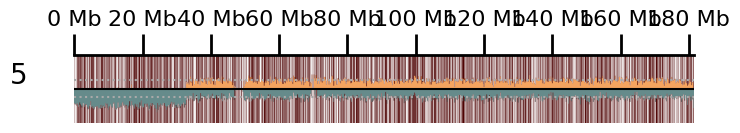

In [14]:
plot_chromosome(df, chromosome = 'chr5', cell = 'BM510x3PE20434', 
                median= 'chrom', overlay='overlay', overlay_color=(.3,0,0))

/Users/tweber/miniconda3/envs/strandtools-condaenv/lib/python3.11/site-packages/strandtools/plot.py:314: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


[<Figure size 2500x4800 with 24 Axes>]

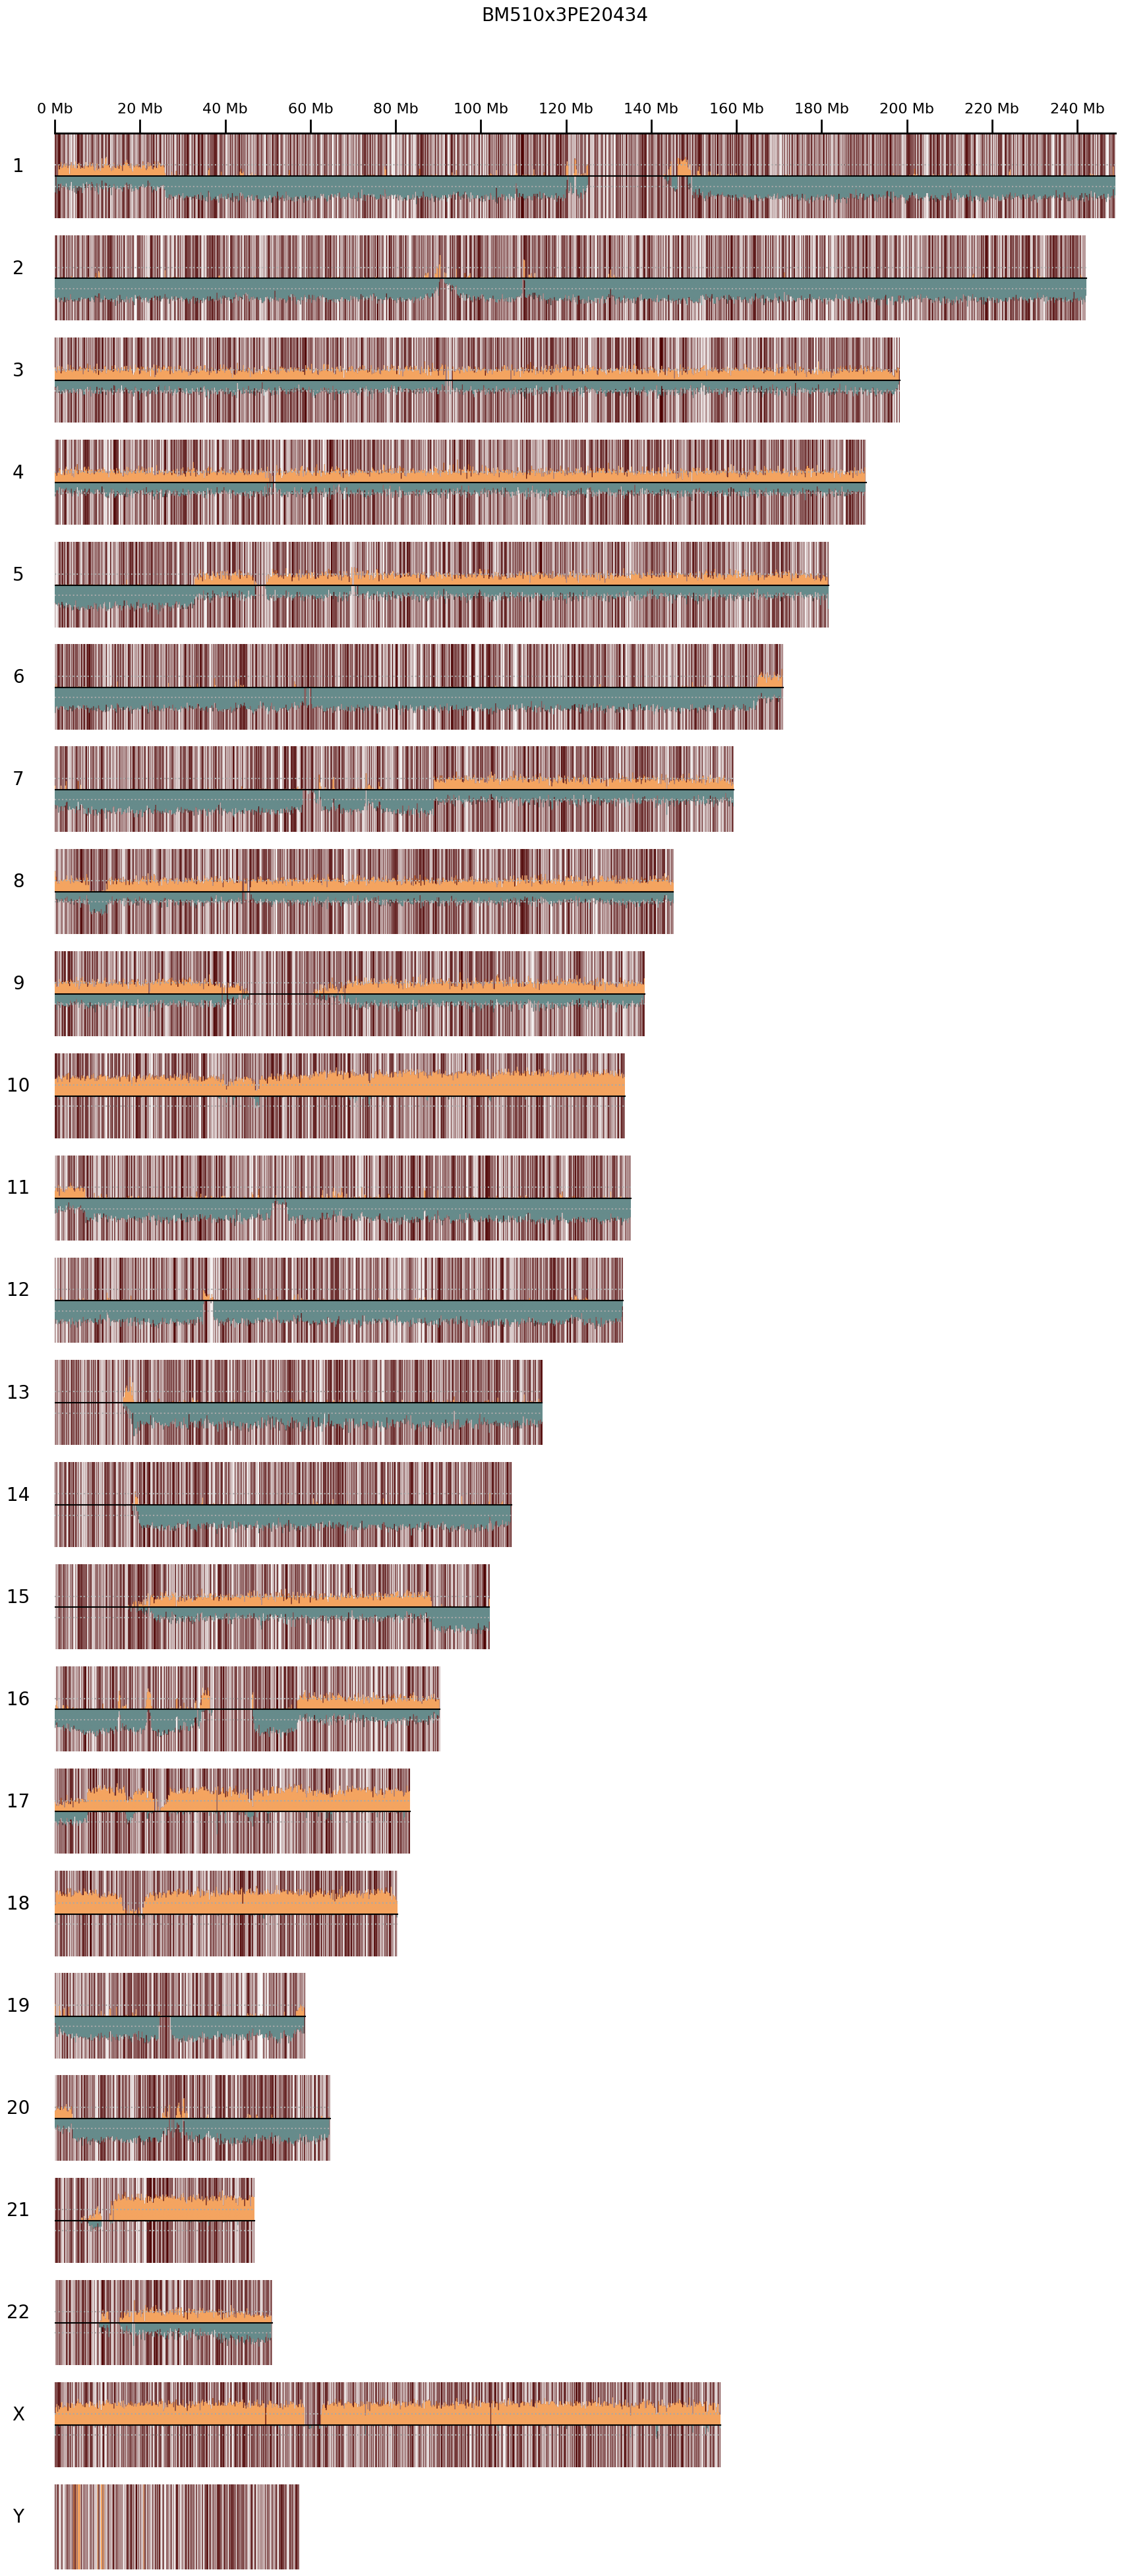

In [15]:
plot(df, groupby='cell', overlay='overlay', median='chrom', overlay_color=(.3,0,0))